Load the MNIST dataset (introduced in Chapter 3), and split it into a
training set, a validation set, and a test set (e.g., use 50,000 instances for
training, 10,000 for validation, and 10,000 for testing). Then train
various classifiers, such as a random forest classifier, an extra-trees
classifier, and an SVM classifier. Next, try to combine them into an
ensemble that outperforms each individual classifier on the validation
set, using soft or hard voting. Once you have found one, try it on the test
set. How much better does it perform compared to the individual
classifiers?

Load data

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml(name='mnist_784')

f:\Projects\machineLearningFundamental\venv\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [4]:
X = mnist["data"].values
y = mnist["target"].values

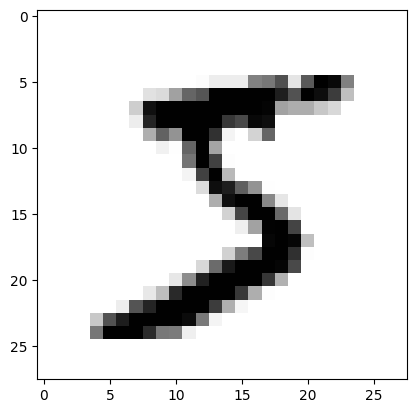

In [8]:
import matplotlib.pyplot as plt

def show_digits(image):
    image = image.reshape(28,28)
    plt.imshow(image, cmap='binary')
    plt.show()
    
show_digits(X[0])    

Split data

In [10]:
X_train = X[:50000]
X_valid = X[50000:60000]
X_test = X[60000:]
y_train = y[:50000]
y_valid = y[50000:60000]
y_test = y[60000:]

Train some classifier Model:
- Logistic Regression
- Decision Tree
- SVM
- KNN
- Gradient Boosting Classifier

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Build model
model1 = LogisticRegression(random_state=42)
model2 = LinearSVC(random_state=42)
model3 = DecisionTreeClassifier(random_state=42)
model4 = KNeighborsClassifier()
model5 = GradientBoostingClassifier(random_state=42)

models = [model1, model2, model3, model4, model5]

In [14]:
# Train model
for model in models:
    model.fit(X_train, y_train)
    print(f"{model} score: {model.score(X_valid,y_valid)}")

f:\Projects\machineLearningFundamental\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42) score: 0.9272


f:\Projects\machineLearningFundamental\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=42) score: 0.8578
DecisionTreeClassifier(random_state=42) score: 0.8822
KNeighborsClassifier() score: 0.9718


KeyboardInterrupt: 